In [1]:
import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [36]:
df= pd.read_csv("cars_final.csv",index_col=0)

In [37]:
df=pd.get_dummies(df)

In [38]:
df

,price,km,hp,Previous Owners,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,Consumption,...,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow
0,15770.0,56013.0,66.0,2.0,5.0,5.0,1422.0,3.0,1220.000000,3.8,...,0,0,0,0,0,0,0,0,0,0
1,14500.0,80000.0,141.0,1.0,3.0,4.0,1798.0,4.0,1255.000000,5.6,...,0,0,0,0,0,1,0,0,0,0
2,14640.0,83450.0,85.0,1.0,4.0,4.0,1598.0,3.0,1330.563953,3.8,...,0,0,0,0,0,0,0,0,0,0
3,14500.0,73000.0,66.0,1.0,3.0,4.0,1422.0,3.0,1195.000000,3.8,...,0,1,0,0,0,0,0,0,0,0
4,16790.0,16200.0,66.0,1.0,5.0,5.0,1422.0,3.0,1227.309322,4.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,39950.0,1653.0,147.0,1.0,5.0,5.0,1997.0,4.0,1758.000000,5.3,...,0,0,0,1,0,0,0,0,0,0
15915,39885.0,9900.0,165.0,1.0,5.0,5.0,1798.0,4.0,1708.000000,7.4,...,0,0,0,1,0,0,0,0,0,0
15916,39875.0,15.0,146.0,1.0,5.0,7.0,1997.0,4.0,1773.400000,5.3,...,0,0,0,0,0,0,0,0,1,0
15917,39700.0,10.0,147.0,1.0,5.0,7.0,1997.0,4.0,1758.000000,5.3,...,0,0,0,1,0,0,0,0,0,0


In [40]:
df.corr()["price"]

price                1.000000
km                  -0.398403
hp                   0.698032
Previous Owners     -0.147669
Nr. of Doors         0.156830
                       ...   
body_color_Red      -0.079054
body_color_Silver   -0.068803
body_color_Violet    0.022709
body_color_White    -0.048251
body_color_Yellow    0.045147
Name: price, Length: 175, dtype: float64

In [5]:
list(df.columns)

['Unnamed: 0',
 'price',
 'km',
 'hp',
 'Previous Owners',
 'Nr. of Doors',
 'Nr. of Seats',
 'Displacement',
 'Cylinders',
 'Weight',
 'Consumption',
 'CO2 Emission',
 'age_as_year',
 'age_as_month',
 'Gear',
 'Alloy wheels',
 'Cab or rented Car',
 'Catalytic Converter',
 'Handicapped enabled',
 'Right hand drive',
 'Roof rack',
 'Shift paddles',
 'Ski bag',
 'Sliding door',
 'Sport package',
 'Sport seats',
 'Sport suspension',
 'Touch screen',
 'Trailer hitch',
 'Tuned car',
 'Voice Control',
 'Winter tyres',
 'ABS',
 'Adaptive Cruise Control',
 'Adaptive headlights',
 'Alarm system',
 'Blind spot monitor',
 'Central door lock',
 'Central door lock with remote control',
 'Daytime running lights',
 'Driver drowsiness detection',
 'Driver-side airbag',
 'Electronic stability control',
 'Emergency brake assistant',
 'Emergency system',
 'Fog lights',
 'Head airbag',
 'Immobilizer',
 'Isofix',
 'LED Daytime Running Lights',
 'LED Headlights',
 'Lane departure warning system',
 'Night vi

In [6]:
#df.drop(['Drive chain','CO2 Emission','age_as_month'],axis=1,inplace=True)

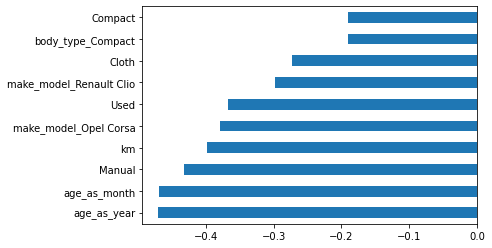

In [7]:
df.corr()["price"].sort_values().head(10).plot.barh()

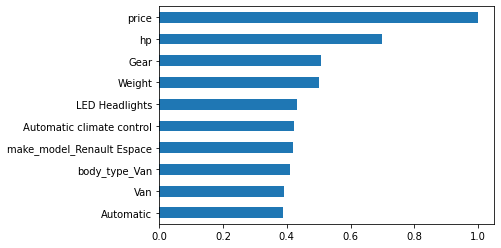

In [8]:
df.corr()["price"].sort_values().tail(10).plot.barh()

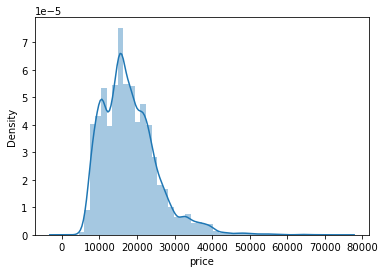

In [9]:
sns.distplot(df.price)

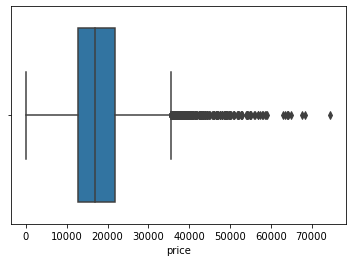

In [10]:
sns.boxplot(df.price,orient="v")

In [11]:
X=df.drop(["price"],axis=1)

y=df["price"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

y_pred=lm.predict(X_test)

eval_metrics(y_test, y_pred)

r2_score: 0.8969337757636976 
 mae: 1651.4875246206534 
 mse: 5562234.753679545 
 rmse: 2358.4390502363094


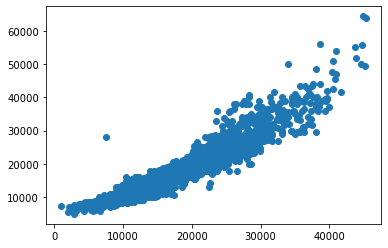

In [14]:
plt.scatter(y_pred,y_test)

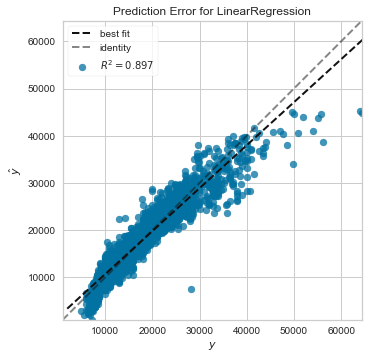

In [15]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

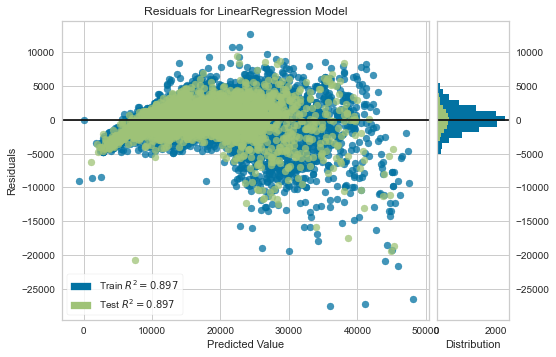

In [16]:
# Yellowbrick Residual Plot
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [17]:
comparison = {"Actual": y_test, "Model prediction": y_pred, "Diff": y_pred-y_test, 
              "Diff %": 100*(y_pred-y_test)/y_test}
comparison_df = pd.DataFrame(comparison).round(1)

comparison_df

,Actual,Model prediction,Diff,Diff %
12887,26379.0,25044.1,-1334.9,-5.1
8140,18990.0,18797.9,-192.1,-1.0
6835,12490.0,12539.3,49.3,0.4
15439,32975.0,33739.8,764.8,2.3
1213,15888.0,15579.5,-308.5,-1.9
...,...,...,...,...
2879,16490.0,18013.0,1523.0,9.2
12165,21450.0,23186.7,1736.7,8.1
7782,24390.0,23835.5,-554.5,-2.3
1665,21900.0,21471.9,-428.1,-2.0


In [18]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=5)
cv_scores.mean()

0.8896928726444278

# Ridge

In [19]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

ridge_model = Ridge(normalize=True)

ridge_model.fit(X_train,y_train)

y_pred=ridge_model.predict(X_test)

eval_metrics(y_test,y_pred)

r2_score: 0.8475543904018236 
 mae: 1993.4695908176234 
 mse: 8227120.7084170645 
 rmse: 2868.2957846806985


In [20]:


#searching for best alpha

ridgecv = RidgeCV(alphas=np.linspace(1,20,50), cv=10)
ridgecv.fit(X_train, y_train)

# best alpha
ridgecv.alpha_

1.0

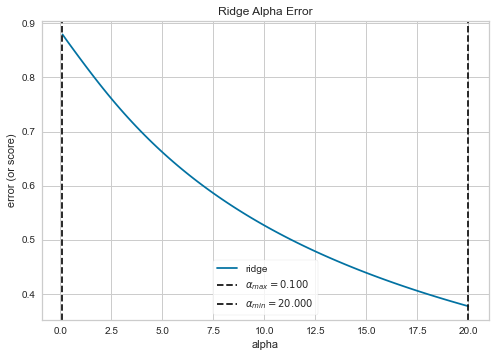

In [21]:
alpha_space = np.linspace(0.1,20,50)


from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [22]:
ridge_model = Ridge(0.1,normalize=True)

ridge_model.fit(X_train,y_train)

y_pred=ridge_model.predict(X_test)

eval_metrics(y_test,y_pred)

r2_score: 0.8904876988687654 
 mae: 1729.7945850669585 
 mse: 5910113.927439489 
 rmse: 2431.072587859007


In [23]:
ridge_model.coef_
coeff_df = pd.DataFrame (ridge_model.coef_,X.columns,columns=['Coefficient'])
coeff_df.sort_values( by='Coefficient',ascending=False)

,Coefficient
make_model_Renault Espace,3168.899569
Semi-automatic,2681.411757
make_model_Audi A3,2562.307430
Heads-up display,2087.954329
Demonstration,2014.828487
...,...
vat_5.0,-6589.866461
body_color_5.0,-6589.866461
Drive chain_5.0,-6589.866461
make_model_5.0,-6589.866461


# Lasso

In [24]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

lasso_model = Lasso(normalize=True)
lasso_model.fit(X_train,y_train)
y_pred=lasso_model.predict(X_test)
eval_metrics(y_test,y_pred)



r2_score: 0.8883888651686123 
 mae: 1734.6930486655806 
 mse: 6023382.904116276 
 rmse: 2454.2581168484044


In [25]:
alpha_space = np.linspace(0.1, 20, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, normalize=True, cv = 5).fit(X_train, y_train)

In [26]:
lasso_cv_model.alpha_

0.1

In [27]:
lasso_model = Lasso(0.1,normalize=True)
lasso_model.fit(X_train,y_train)
y_pred=lasso_model.predict(X_test)
eval_metrics(y_test,y_pred)

r2_score: 0.8968386544346394 
 mae: 1668.2045786482238 
 mse: 5567368.221663103 
 rmse: 2359.527118230071


In [28]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})

significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

128

In [29]:

significant_features.sort_values( by='coef',ascending=False)

,features,coef
135,make_model_Audi A1,7116.251846
137,make_model_Audi A3,6807.128892
129,Demonstration,2376.124724
126,Semi-automatic,2251.077324
81,Heads-up display,2236.279075
...,...,...
139,make_model_Opel Corsa,-2594.197448
141,make_model_Renault Clio,-5459.528524
169,body_color_Orange,-6726.197549
142,make_model_Renault Duster,-8266.690786


In [30]:
significant_features[significant_features.features=="hp"]

,features,coef
2,hp,88.779669


## Random Forest

In [31]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
rf_model=RandomForestClassifier().fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

# XGBOOST

In [24]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
xgb_model =  XGBRegressor(n_estimators = 1500,  learning_rate = 0.05, max_depth= None, subsample =0.8)
xgb_model.fit(X_train, y_train,
             early_stopping_rounds=10,
             eval_set=[(X_test, y_test)],
             verbose=True)

y_pred = xgb_model.predict(X_test)

[0]	validation_0-rmse:18404.38281
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:17505.34375
[2]	validation_0-rmse:16654.15820
[3]	validation_0-rmse:15842.99219
[4]	validation_0-rmse:15072.15918
[5]	validation_0-rmse:14340.20508
[6]	validation_0-rmse:13644.05859
[7]	validation_0-rmse:12982.63965
[8]	validation_0-rmse:12355.39160
[9]	validation_0-rmse:11760.39160
[10]	validation_0-rmse:11197.42481
[11]	validation_0-rmse:10660.71777
[12]	validation_0-rmse:10149.83301
[13]	validation_0-rmse:9665.36426
[14]	validation_0-rmse:9204.33301
[15]	validation_0-rmse:8768.03516
[16]	validation_0-rmse:8354.22754
[17]	validation_0-rmse:7962.20801
[18]	validation_0-rmse:7588.42676
[19]	validation_0-rmse:7235.94434
[20]	validation_0-rmse:6898.28711
[21]	validation_0-rmse:6578.00147
[22]	validation_0-rmse:6277.32129
[23]	validation_0-rmse:5991.30518
[24]	validation_0-rmse:5722.40625
[25]	validation_0-rmse:5463.61572
[26]	validation_0-rmse:5219.60498
[27]	validatio

[235]	validation_0-rmse:1092.14050
[236]	validation_0-rmse:1090.59802
[237]	validation_0-rmse:1089.63452
[238]	validation_0-rmse:1088.94763
[239]	validation_0-rmse:1087.29382
[240]	validation_0-rmse:1087.14465
[241]	validation_0-rmse:1086.90271
[242]	validation_0-rmse:1086.36401
[243]	validation_0-rmse:1084.79260
[244]	validation_0-rmse:1083.97107
[245]	validation_0-rmse:1084.20166
[246]	validation_0-rmse:1083.64563
[247]	validation_0-rmse:1083.51306
[248]	validation_0-rmse:1083.24548
[249]	validation_0-rmse:1082.55762
[250]	validation_0-rmse:1082.04919
[251]	validation_0-rmse:1081.53613
[252]	validation_0-rmse:1081.15759
[253]	validation_0-rmse:1080.62073
[254]	validation_0-rmse:1080.22107
[255]	validation_0-rmse:1079.87817
[256]	validation_0-rmse:1079.61499
[257]	validation_0-rmse:1078.49719
[258]	validation_0-rmse:1077.89380
[259]	validation_0-rmse:1076.43091
[260]	validation_0-rmse:1075.15918
[261]	validation_0-rmse:1074.47754
[262]	validation_0-rmse:1073.45459
[263]	validation_0-r

[471]	validation_0-rmse:977.90594
[472]	validation_0-rmse:977.89984
[473]	validation_0-rmse:977.63403
[474]	validation_0-rmse:977.49860
[475]	validation_0-rmse:977.05579
[476]	validation_0-rmse:976.76166
[477]	validation_0-rmse:976.66986
[478]	validation_0-rmse:976.44574
[479]	validation_0-rmse:976.30139
[480]	validation_0-rmse:976.27277
[481]	validation_0-rmse:975.84058
[482]	validation_0-rmse:975.66046
[483]	validation_0-rmse:975.60413
[484]	validation_0-rmse:975.41602
[485]	validation_0-rmse:975.62433
[486]	validation_0-rmse:975.35370
[487]	validation_0-rmse:975.22333
[488]	validation_0-rmse:975.24036
[489]	validation_0-rmse:974.71899
[490]	validation_0-rmse:974.73145
[491]	validation_0-rmse:974.51404
[492]	validation_0-rmse:974.20697
[493]	validation_0-rmse:973.99957
[494]	validation_0-rmse:973.65332
[495]	validation_0-rmse:973.05231
[496]	validation_0-rmse:972.23682
[497]	validation_0-rmse:972.00165
[498]	validation_0-rmse:972.09741
[499]	validation_0-rmse:971.51404
[500]	validati

[712]	validation_0-rmse:924.61829
[713]	validation_0-rmse:924.37079
[714]	validation_0-rmse:924.34815
[715]	validation_0-rmse:924.27820
[716]	validation_0-rmse:924.21143
[717]	validation_0-rmse:924.20447
[718]	validation_0-rmse:923.97296
[719]	validation_0-rmse:924.02716
[720]	validation_0-rmse:923.95477
[721]	validation_0-rmse:923.87940
[722]	validation_0-rmse:923.84192
[723]	validation_0-rmse:923.80884
[724]	validation_0-rmse:923.81409
[725]	validation_0-rmse:923.73511
[726]	validation_0-rmse:923.68719
[727]	validation_0-rmse:923.58429
[728]	validation_0-rmse:923.46954
[729]	validation_0-rmse:923.45813
[730]	validation_0-rmse:923.12378
[731]	validation_0-rmse:922.93683
[732]	validation_0-rmse:922.69367
[733]	validation_0-rmse:922.45489
[734]	validation_0-rmse:922.53284
[735]	validation_0-rmse:922.63690
[736]	validation_0-rmse:922.60724
[737]	validation_0-rmse:922.44360
[738]	validation_0-rmse:922.37903
[739]	validation_0-rmse:922.20935
[740]	validation_0-rmse:921.95789
[741]	validati

[953]	validation_0-rmse:902.27264
[954]	validation_0-rmse:902.16046
[955]	validation_0-rmse:902.16577
[956]	validation_0-rmse:902.03503
[957]	validation_0-rmse:902.02020
[958]	validation_0-rmse:902.02557
[959]	validation_0-rmse:901.88916
[960]	validation_0-rmse:901.69092
[961]	validation_0-rmse:901.64929
[962]	validation_0-rmse:901.59821
[963]	validation_0-rmse:901.44342
[964]	validation_0-rmse:901.37909
[965]	validation_0-rmse:901.34235
[966]	validation_0-rmse:901.24670
[967]	validation_0-rmse:901.01337
[968]	validation_0-rmse:900.92706
[969]	validation_0-rmse:900.80713
[970]	validation_0-rmse:900.72259
[971]	validation_0-rmse:900.58069
[972]	validation_0-rmse:900.61420
[973]	validation_0-rmse:900.42096
[974]	validation_0-rmse:900.51251
[975]	validation_0-rmse:900.47162
[976]	validation_0-rmse:900.37720
[977]	validation_0-rmse:900.33813
[978]	validation_0-rmse:900.24542
[979]	validation_0-rmse:900.20416
[980]	validation_0-rmse:900.16437
[981]	validation_0-rmse:900.20422
[982]	validati

[1189]	validation_0-rmse:887.48389
[1190]	validation_0-rmse:887.32727
[1191]	validation_0-rmse:887.28699
[1192]	validation_0-rmse:887.22156
[1193]	validation_0-rmse:887.19488
[1194]	validation_0-rmse:887.10352
[1195]	validation_0-rmse:887.13452
[1196]	validation_0-rmse:887.09912
[1197]	validation_0-rmse:887.04285
[1198]	validation_0-rmse:886.89777
[1199]	validation_0-rmse:886.87830
[1200]	validation_0-rmse:886.82080
[1201]	validation_0-rmse:886.75610
[1202]	validation_0-rmse:886.70642
[1203]	validation_0-rmse:886.67413
[1204]	validation_0-rmse:886.61511
[1205]	validation_0-rmse:886.62170
[1206]	validation_0-rmse:886.54303
[1207]	validation_0-rmse:886.30902
[1208]	validation_0-rmse:886.25354
[1209]	validation_0-rmse:886.21258
[1210]	validation_0-rmse:886.20343
[1211]	validation_0-rmse:886.18976
[1212]	validation_0-rmse:886.18658
[1213]	validation_0-rmse:886.17175
[1214]	validation_0-rmse:886.20795
[1215]	validation_0-rmse:886.21539
[1216]	validation_0-rmse:886.23950
[1217]	validation_0-

In [66]:
eval_metrics(y_test,y_pred)

r2_score: 0.9855830267151473 
 mae: 478.087474749892 
 mse: 778049.1663692131 
 rmse: 882.0709531376788


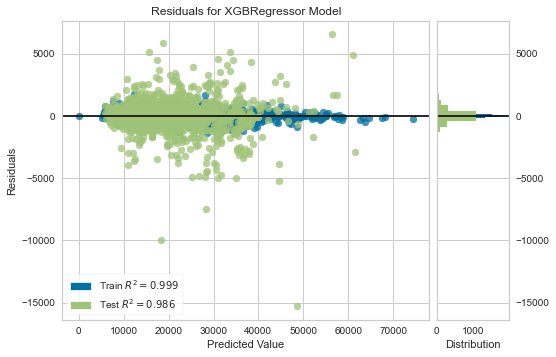

In [67]:
# Yellowbrick Residual Plot
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(xgb_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [68]:
#xgb_model.feature_importances_

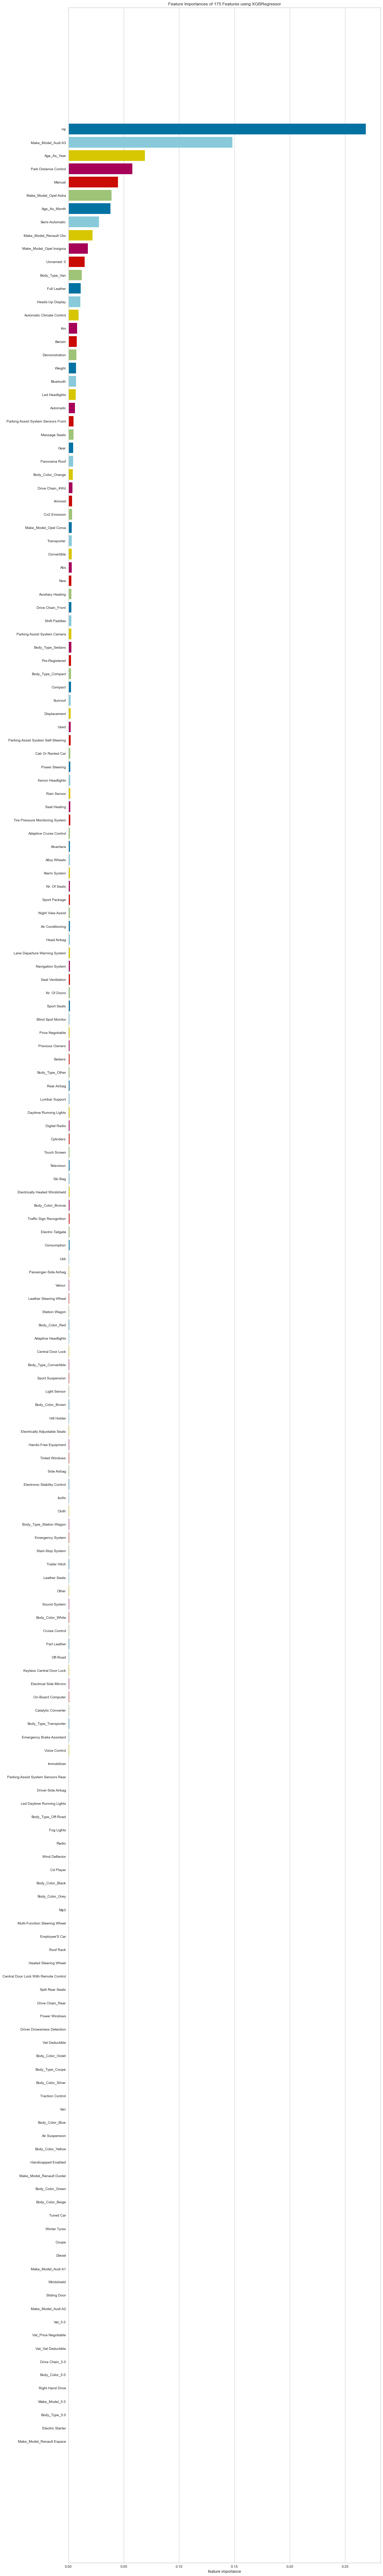

In [69]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(xgb_model, labels=labels, relative=False)
visualizer = RadViz(size=(1080, 7200))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

# grid search

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [ ]:
xgb =  XGBRegressor(n_estimators = 1500,  learning_rate = 0.05, max_depth= None, subsample =0.8)

In [ ]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train,
             early_stopping_rounds=10,
             eval_set=[(X_test, y_test)],
             verbose=True)

xgb_cv_model.best_params_

In [ ]:
xgb_tuned = XGBRegressor(learning_rate= 0.3, 
                                max_depth= 5, 
                                n_estimators= 300, 
                                subsample= 1).fit(X_train, y_train)

y_pred = xgb_tuned.predict(X_test)
eval_metrics(y_test,y_pred)

In [ ]:
eval_metrics(y_test,y_pred)

# PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)

df[0:5,0:5]

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

component_df = pd.DataFrame(data=pca_fit, columns = ["first_component","second_component"])

component_df
# birçok feature ı temsil ediyor 2 feature

In [ ]:
pca = PCA().fit(df)
#x=range(1,18)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component count");
plt.ylabel("Variance Ratio");

In [ ]:
pca = PCA(n_components=75)
pca_fit = pca.fit_transform(df)


In [ ]:
pca.explained_variance_ratio_

# RFE

In [26]:
from sklearn.feature_selection import RFE


selector = RFE(xgb_model, n_features_to_select=6, step=10,verbose=2  )
selector = selector.fit(X, y)
selector.support_




Fitting estimator with 175 features.
Fitting estimator with 165 features.
Fitting estimator with 155 features.
Fitting estimator with 145 features.
Fitting estimator with 135 features.
Fitting estimator with 125 features.
Fitting estimator with 115 features.
Fitting estimator with 105 features.
Fitting estimator with 95 features.
Fitting estimator with 85 features.
Fitting estimator with 75 features.
Fitting estimator with 65 features.
Fitting estimator with 55 features.
Fitting estimator with 45 features.
Fitting estimator with 35 features.
Fitting estimator with 25 features.
Fitting estimator with 15 features.


array([False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,

In [27]:
selector.support_

array([False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,

In [30]:
features = []
for i in list(enumerate(selector.support_.tolist())):
    if i[1] == True:
        features.append(i[0])
features

X.columns[features]



Index(['hp', 'age_as_year', 'age_as_month', 'Manual', 'make_model_Audi A3',
       'make_model_Opel Astra'],
      dtype='object')

In [32]:
features

[2, 11, 12, 125, 137, 138]

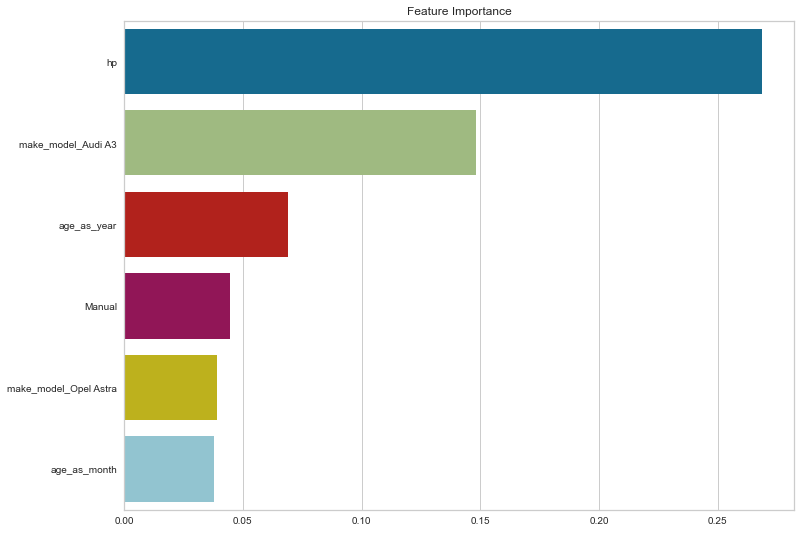

In [33]:
feature_imp = pd.Series(xgb_model.feature_importances_[features],
                        index=X_train.columns[features]).sort_values(ascending=False)
plt.figure(figsize=(12,9))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

In [31]:
xgb_model.feature_importances_

array([1.4630183e-02, 7.7524958e-03, 2.6863849e-01, 1.0588755e-03,
       1.2149967e-03, 1.4325248e-03, 2.0467758e-03, 9.5368392e-04,
       6.7912522e-03, 8.8567554e-04, 3.2232767e-03, 6.8998002e-02,
       3.7930287e-02, 4.4061313e-03, 1.4536688e-03, 1.7909628e-03,
       5.6652282e-04, 2.8145028e-04, 0.0000000e+00, 4.1452781e-04,
       2.6464730e-03, 9.2673657e-04, 4.4137787e-06, 1.3954920e-03,
       1.2067420e-03, 7.8399142e-04, 9.5215649e-04, 6.7003688e-04,
       1.9155319e-04, 5.5363763e-04, 1.8831639e-04, 2.8478180e-03,
       1.4659446e-03, 7.9939322e-04, 1.4438740e-03, 1.1210932e-03,
       7.9439103e-04, 4.1050120e-04, 9.7093557e-04, 3.3232363e-04,
       5.2197988e-04, 7.1549159e-04, 5.5857265e-04, 6.7513320e-04,
       5.1221956e-04, 1.2641372e-03, 5.3183612e-04, 7.0582901e-04,
       5.1759480e-04, 6.5484308e-03, 1.2550844e-03, 1.3953857e-03,
       8.1118871e-04, 1.7127929e-03, 1.0037561e-03, 7.1554666e-04,
       1.5595309e-03, 3.1709397e-04, 8.9487783e-04, 1.6127201e

# Lasso